In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'x'
df = pd.read_csv(file_path)
import warnings

warnings.filterwarnings('ignore')
sns.set_style()

#### Korelasyonlar

In [3]:

correlation_matrix = df.corr()

In [4]:

print(correlation_matrix)

                    cement      slag    flyash     water  superplasticizer  \
cement            1.000000 -0.275216 -0.397467 -0.081587          0.092386   
slag             -0.275216  1.000000 -0.323580  0.107252          0.043270   
flyash           -0.397467 -0.323580  1.000000 -0.256984          0.377503   
water            -0.081587  0.107252 -0.256984  1.000000         -0.657533   
superplasticizer  0.092386  0.043270  0.377503 -0.657533          1.000000   
coarseaggregate  -0.109349 -0.283999 -0.009961 -0.182294         -0.265999   
fineaggregate    -0.222718 -0.281603  0.079108 -0.450661          0.222691   
age               0.081946 -0.044246 -0.154371  0.277618         -0.192700   
csMPa             0.497832  0.134829 -0.105755 -0.289633          0.366079   

                  coarseaggregate  fineaggregate       age     csMPa  
cement                  -0.109349      -0.222718  0.081946  0.497832  
slag                    -0.283999      -0.281603 -0.044246  0.134829  
flyash

In [5]:

selected_correlation = correlation_matrix.iloc[-1:]


styled_correlation = selected_correlation.style.background_gradient(cmap='coolwarm', axis=1)


styled_correlation

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


- csMPa değişkeninin cement ile orta derece korelasyonu vardır (r2=0.4978)  

- csMPa değişkeninin superplasticizer ile zayıf derece korelasyonu vardır (r2=0.3660)

- csMPa değişkeninin age ile zayıf derece korelasyonu vardır (r2=0.328873)

- csMPa değişkeninin water ile negatif,zayıf derece korelasyonu vardır (r2=-0.289633)


In [7]:

styled_correlation = correlation_matrix.style.background_gradient(cmap='coolwarm', axis=1)


styled_correlation

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [8]:

from scipy.stats import pearsonr


csMPa_correlation = correlation_matrix['csMPa'].drop('csMPa')


results = []


for column in csMPa_correlation.index:
    corr, p_value = pearsonr(df['csMPa'], df[column])
    
    # Sonuçları listeye ekle
    results.append({
        'Değişken': column,
        'Korelasyon': f"{corr:.3f}",
        'p-değeri': f"{p_value:.3f}",
        'Anlamlılık': 'Evet' if p_value < 0.05 else 'Hayır'
    })


results_df = pd.DataFrame(results)


print(results_df)



           Değişken Korelasyon p-değeri Anlamlılık
0            cement      0.498    0.000       Evet
1              slag      0.135    0.000       Evet
2            flyash     -0.106    0.001       Evet
3             water     -0.290    0.000       Evet
4  superplasticizer      0.366    0.000       Evet
5   coarseaggregate     -0.165    0.000       Evet
6     fineaggregate     -0.167    0.000       Evet
7               age      0.329    0.000       Evet


In [9]:

for column in csMPa_correlation.index:
    corr, p_value = pearsonr(df['csMPa'], df[column])
    print(f"Değişken: {column} | Korelasyon: {corr:.3f} | p-değeri: {p_value:.3f}")

    
    if p_value < 0.05:
        print(f"Değişken {column} ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlıdır.")
    else:
        print(f"Değişken {column} ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlı değildir.")

Değişken: cement | Korelasyon: 0.498 | p-değeri: 0.000
Değişken cement ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlıdır.
Değişken: slag | Korelasyon: 0.135 | p-değeri: 0.000
Değişken slag ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlıdır.
Değişken: flyash | Korelasyon: -0.106 | p-değeri: 0.001
Değişken flyash ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlıdır.
Değişken: water | Korelasyon: -0.290 | p-değeri: 0.000
Değişken water ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlıdır.
Değişken: superplasticizer | Korelasyon: 0.366 | p-değeri: 0.000
Değişken superplasticizer ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlıdır.
Değişken: coarseaggregate | Korelasyon: -0.165 | p-değeri: 0.000
Değişken coarseaggregate ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlıdır.
Değişken: fineaggregate | Korelasyon: -0.167 | p-değeri: 0.000
Değişken fineaggregate ile 'sell

In [10]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


numeric_columns = df.select_dtypes(include=['float64', 'int64'])  # Sayısal sütunları seç


X = add_constant(numeric_columns)


vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)


           Variable          VIF
0             const  6736.889520
1            cement     8.949859
2              slag     8.025397
3            flyash     6.465776
4             water     7.099472
5  superplasticizer     2.992177
6   coarseaggregate     5.093047
7     fineaggregate     7.029503
8               age     1.603560
9             csMPa     2.600915


In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


numeric_columns = df.select_dtypes(include=['float64', 'int64'])  # Sayısal sütunları seç


X = add_constant(numeric_columns)


vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


high_vif = vif_data[vif_data['VIF'] > 10]


if not high_vif.empty:
    print("Bazı değişkenler için çoklu doğrusal bağlantı sorunu var! Yüksek VIF değerleri tespit edildi:")
    print(high_vif)
else:
    print("Çoklu doğrusal bağlantı sorunu yok.")


Bazı değişkenler için çoklu doğrusal bağlantı sorunu var! Yüksek VIF değerleri tespit edildi:
  Variable         VIF
0    const  6736.88952


- const" (sabit terim) için yüksek VIF değeri gözlemlendiğinde, bu durum aynı zamanda sabit terimin regresyon modelinde istatistiksel olarak anlamlı olmadığını da gösterebilir.

- Eğer "const" değişkeninde yüksek VIF değeri gördüyseniz, bu genellikle çoklu doğrusal bağlantı nedeniyle değil, modelin yapısal bir problemine işaret eder

### Normallik, Çarpıklık ,Basıklık

- Shapiro-Wilks testi

In [15]:
from scipy import stats


numeric_columns = df.select_dtypes(include='number').columns


alpha = 0.05  # %5 anlamlılık seviyesi
for column in numeric_columns:
    statistic, p_value = stats.shapiro(df[column])


    print(f"Sütun: {column}")
    print(f"Test İstatistiği: {statistic}")
    print(f"P Değeri: {p_value}")

    if p_value > alpha:
        print("Veri normal dağılıyor gibi görünüyor (H0 kabul edilir).")
    else:
        print("Veri normal dağılmıyor (H0 reddedilir).")
    print("-" * 50)


Sütun: cement
Test İstatistiği: 0.9589598178863525
P Değeri: 2.0807908303272703e-16
Veri normal dağılmıyor (H0 reddedilir).
--------------------------------------------------
Sütun: slag
Test İstatistiği: 0.8124092817306519
P Değeri: 5.795507839106461e-33
Veri normal dağılmıyor (H0 reddedilir).
--------------------------------------------------
Sütun: flyash
Test İstatistiği: 0.7619988918304443
P Değeri: 4.13455134252981e-36
Veri normal dağılmıyor (H0 reddedilir).
--------------------------------------------------
Sütun: water
Test İstatistiği: 0.9803934693336487
P Değeri: 1.4666834413645802e-10
Veri normal dağılmıyor (H0 reddedilir).
--------------------------------------------------
Sütun: superplasticizer
Test İstatistiği: 0.8660276532173157
P Değeri: 9.058676493560987e-29
Veri normal dağılmıyor (H0 reddedilir).
--------------------------------------------------
Sütun: coarseaggregate
Test İstatistiği: 0.9824528694152832
P Değeri: 8.345865110115369e-10
Veri normal dağılmıyor (H0 red

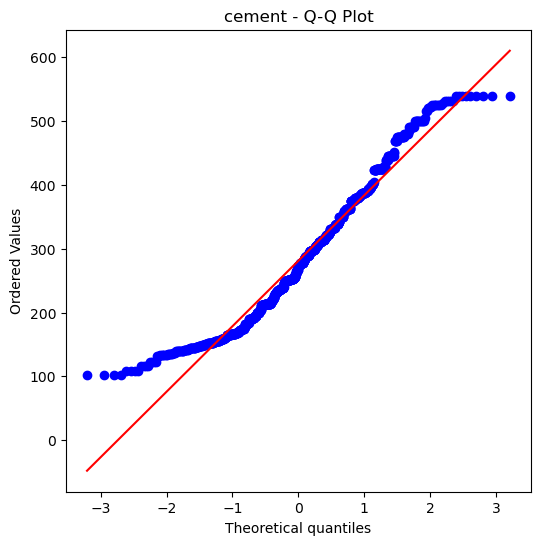

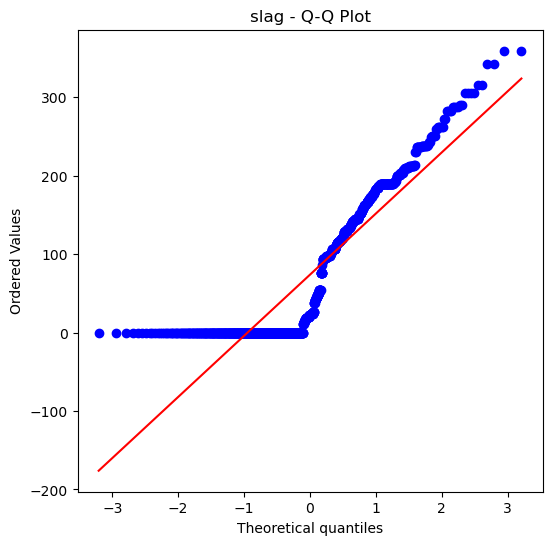

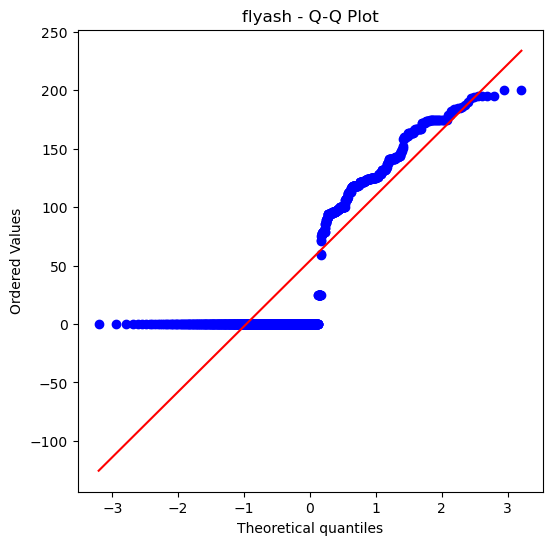

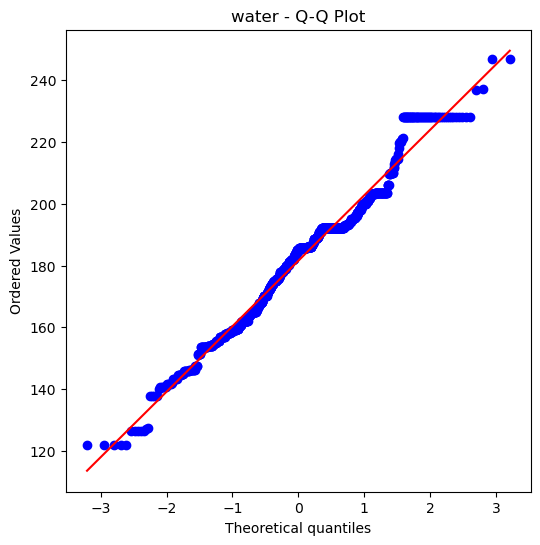

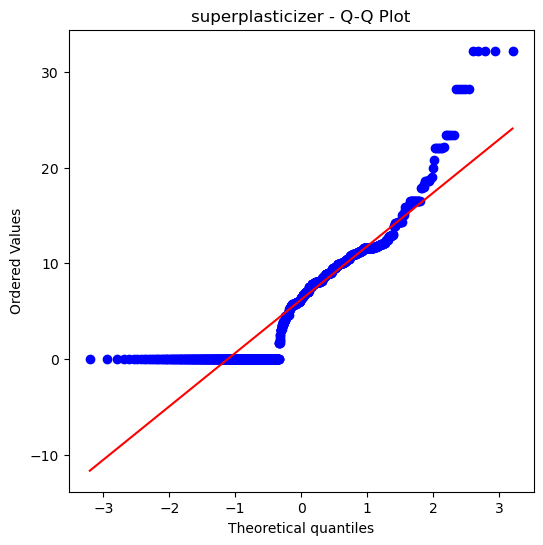

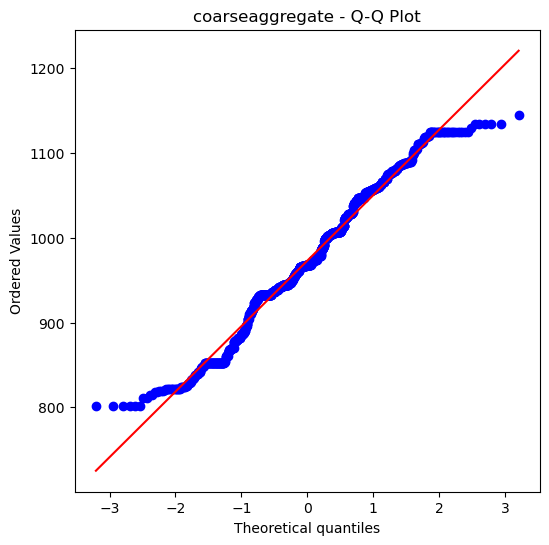

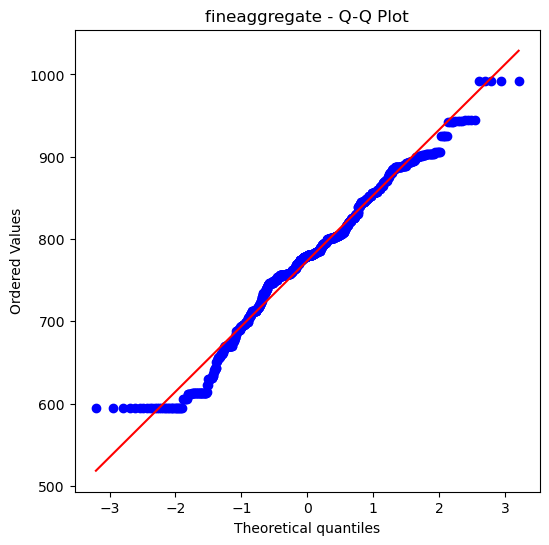

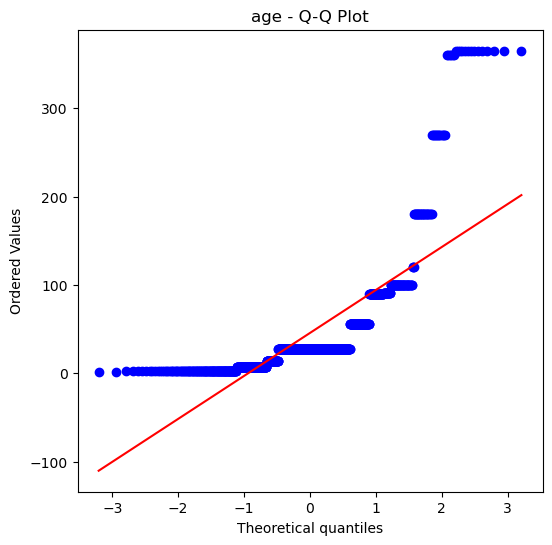

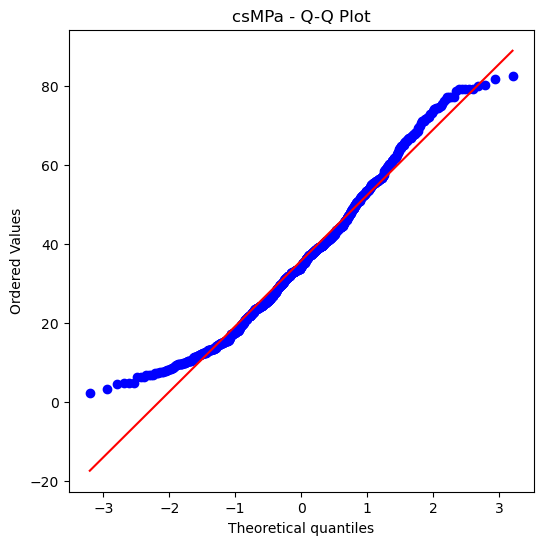

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

for column in numeric_columns:
    plt.figure(figsize=(6, 6))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f"{column} - Q-Q Plot")
    plt.show()


In [17]:

numeric_columns = df.select_dtypes(include='number').columns


for column in numeric_columns:
    skewness = df[column].skew()
    kurtosis = df[column].kurt()


    if skewness > 2:
        skewness_degree = "Şiddetli sağa çarpık"
    elif skewness > 1:
        skewness_degree = "Orta derecede sağa çarpık"
    elif skewness > 0:
        skewness_degree = "Hafif sağa çarpık"
    elif skewness < -2:
        skewness_degree = "Şiddetli sola çarpık"
    elif skewness < -1:
        skewness_degree = "Orta derecede sola çarpık"
    elif skewness < 0:
        skewness_degree = "Hafif sola çarpık"
    else:
        skewness_degree = "Simetrik (normal dağılıma yakın)"


    if kurtosis > 3:
        kurtosis_degree = "Aşırı sivri (çok basık)"
    elif kurtosis == 3:
        kurtosis_degree = "Normal dağılıma yakın (kurtosis = 3)"
    else:
        kurtosis_degree = "Düz (basık değil)"


    print(f"Sütun: {column}")
    print(f"Çarpıklık (Skewness): {skewness:.3f} - {skewness_degree}")
    print(f"Basıklık (Kurtosis): {kurtosis:.3f} - {kurtosis_degree}")
    print("-" * 50)


Sütun: cement
Çarpıklık (Skewness): 0.509 - Hafif sağa çarpık
Basıklık (Kurtosis): -0.521 - Düz (basık değil)
--------------------------------------------------
Sütun: slag
Çarpıklık (Skewness): 0.801 - Hafif sağa çarpık
Basıklık (Kurtosis): -0.508 - Düz (basık değil)
--------------------------------------------------
Sütun: flyash
Çarpıklık (Skewness): 0.537 - Hafif sağa çarpık
Basıklık (Kurtosis): -1.329 - Düz (basık değil)
--------------------------------------------------
Sütun: water
Çarpıklık (Skewness): 0.075 - Hafif sağa çarpık
Basıklık (Kurtosis): 0.122 - Düz (basık değil)
--------------------------------------------------
Sütun: superplasticizer
Çarpıklık (Skewness): 0.907 - Hafif sağa çarpık
Basıklık (Kurtosis): 1.411 - Düz (basık değil)
--------------------------------------------------
Sütun: coarseaggregate
Çarpıklık (Skewness): -0.040 - Hafif sola çarpık
Basıklık (Kurtosis): -0.599 - Düz (basık değil)
--------------------------------------------------
Sütun: fineaggregat

- Çarpıklık (Skewness) çoğu sütunda hafif sağa çarpık veya hafif sola çarpık olarak değerlendirilmiş, yalnızca age sütunu şiddetli sağa çarpık olarak bulunmuş.

- Basıklık (Kurtosis) ise genellikle düz (basık değil) olarak tespit edilmiş, yalnızca age sütunu aşırı sivri olarak değerlendirilmiş.

- Normal Dağılım Testi Sonuçları: Tüm sütunlar için Shapiro-Wilk testi sonucunda p-değeri çok küçük çıkmış, bu da verilerin normal dağılmadığını gösteriyor.

##### Sonuç olarak, veri setindeki tüm sütunlar normal dağılım göstermemektedir.

#### Mutual Info Regression

mutual_info_regression, scikit-learn kütüphanesinde bulunan bir fonksiyondur ve bağımsız değişkenlerin (özelliklerin) bağımlı değişkenle olan karşılıklı bilgi miktarını ölçen bir yöntemdir. Bu yöntem, özellikle regresyon problemlerinde, bağımsız değişkenlerin hedef değişkenle olan ilişkisini anlamak için kullanılır.

Temel Kavramlar:

Karşılıklı Bilgi (Mutual Information): İki rastgele değişkenin birbirine ne kadar bilgi sağladığını ölçen bir istatistiksel bir ölçüdür. Eğer iki değişken 

birbirinden bağımsızsa, karşılıklı bilgi sıfırdır. Yani, bir değişkenin değeri hakkında diğer değişkenin hiç bilgi sağladığı söylenemez.

Karşılıklı bilgi, bağımsız değişkenlerin hedef değişkenle ne kadar ilişkili olduğunu anlamada kullanılır. Daha yüksek karşılıklı bilgi değeri, o bağımsız değişkenin 
hedef değişken hakkında daha fazla bilgi sunduğunu gösterir.

mutual_info_regression Fonksiyonu:
Bu fonksiyon, sürekli hedef değişkenlerle (yani regresyon problemleri) ilişkili olarak bağımsız değişkenlerin karşılıklı bilgisini hesaplar. Karşılıklı bilgi, genellikle özelliklerin önemli olup olmadığını değerlendirmede faydalıdır.


mutual_info_regression Kullanım Alanları:

Özellik Seçimi (Feature Selection): Özelliklerin hedef değişkenle olan ilişkisini anlamak ve daha anlamlı özellikler seçmek için kullanılır. Karşılıklı bilgi değeri düşük olan özellikler, modelden çıkarılabilir.

Bağımsız Değişkenler Arasındaki İlişkiyi Anlamak: Hangi özelliklerin hedef değişkenle daha güçlü bir ilişkisi olduğunu belirlemek ve gereksiz özellikleri azaltmak amacıyla kullanılabilir.

Veri Ön İşleme: Veri setini modellemeye uygun hale getirmek için, önemli özellikleri belirleyip daha verimli ve hızlı modeller oluşturabilirsiniz.


mutual_info_regression fonksiyonu, regresyon problemlerindeki bağımsız değişkenlerin (özelliklerin) hedef değişkenle olan ilişkisini ölçen, karşılıklı bilgi temelli bir yöntemdir. Bu yöntem, özellikle özelliklerin önemini anlamak ve özellik seçimi yapmak için kullanışlıdır.


mutual_info_regression fonksiyonu sayısal (veya sürekli) verilerle kullanılır.

Normal Dağılım ve Çarpıklık: Mutual information, özelliklerin ve hedef değişkeninin normal dağılıp dağılmadığına veya çarpık olup olmadığına bakmaz. Bu metod, doğrudan verinin dağılımına duyarlı değildir, çünkü doğrusal olmayan ilişkileri de yakalayabilir. Örneğin, çarpık veriler veya normal dağılmayan verilerde de mutual_info_regression önemli ilişkiyi tespit edebilir.

Özetle, verinizin çarpıklığı ve normal dağılıma uygun olmaması, mutual_info_regression'ın başarısını etkilemez. Zira bu yöntem, doğrusal olmayan ilişkilere de duyarlıdır.


Çarpıklık Durumunda: Verinizin çarpık olması, örneğin daha fazla sağa ya da sola kaymış olması, bazı klasik parametrik yöntemleri etkileyebilir (örneğin, Pearson korelasyonu). Ancak mutual_info_regression için bu durum, özellikle doğrusal olmayan ilişkiler söz konusu olduğunda, önemli bir sorun teşkil etmez.

Normal Dağılımın Önemi: Normal dağılım varsayımı çoğu zaman parametre tahmini ve bazı hipotez testlerinde önemlidir. Ancak mutual_info_regression gibi non-parametrik yöntemlerde bu tür dağılım varsayımları geçerli değildir. Bu nedenle normal dağılım varsayımına sahip olmayan verilerle bile güvenle kullanılabilir.

In [20]:

from sklearn.feature_selection import mutual_info_regression
import pandas as pd



X = df.drop(columns=['csMPa'])  
y = df['csMPa']  


mi = mutual_info_regression(X, y)


mi_results = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
})
print(mi_results.sort_values(by='Mutual Information', ascending=False))


            Feature  Mutual Information
3             water            0.362057
7               age            0.356029
0            cement            0.306220
5   coarseaggregate            0.250085
6     fineaggregate            0.210678
4  superplasticizer            0.210205
1              slag            0.179566
2            flyash            0.123278


Yüksek Karşılıklı Bilgi (0.3 ve üzeri):

Eğer karşılıklı bilgi değeri 0.3 veya daha yüksekse, bu, değişkenler arasında güçlü bir ilişki olduğunu gösterir. Bu, modelleme sürecinde önemli değişkenler olarak kabul edilebilir.
Örneğin, age ve water değişkenleri 0.36 ve 0.35 ile yüksek karşılıklı bilgiye sahip.
Orta Karşılıklı Bilgi (0.1 - 0.3):

Karşılıklı bilgi değeri 0.1 ile 0.3 arasındaysa, bu değişkenler arasında orta seviyede bir ilişki vardır. Bu seviyede, değişkenler modelleme için faydalı olabilir ancak o kadar belirgin bir etkiye sahip değillerdir.
Örneğin, coarseaggregate ve superplasticizer 0.25 ve 0.21 değerleri ile orta seviyede ilişki gösteriyor.
Düşük Karşılıklı Bilgi (0.1'in altı):

Karşılıklı bilgi değeri 0.1'in altındaysa, bu, değişkenler arasında zayıf bir ilişki olduğunu gösterir. Bu değişkenler, modelleme sürecinde genellikle daha az etkili olabilirler ve belki de dahil edilmeyebilirler.


Özet Sınıflandırma Önerisi:

- Yüksek: Mutual Information >= 0.3

- Orta: 0.1 <= Mutual Information < 0.3

- Düşük: Mutual Information < 0.1


<Figure size 1500x1000 with 0 Axes>

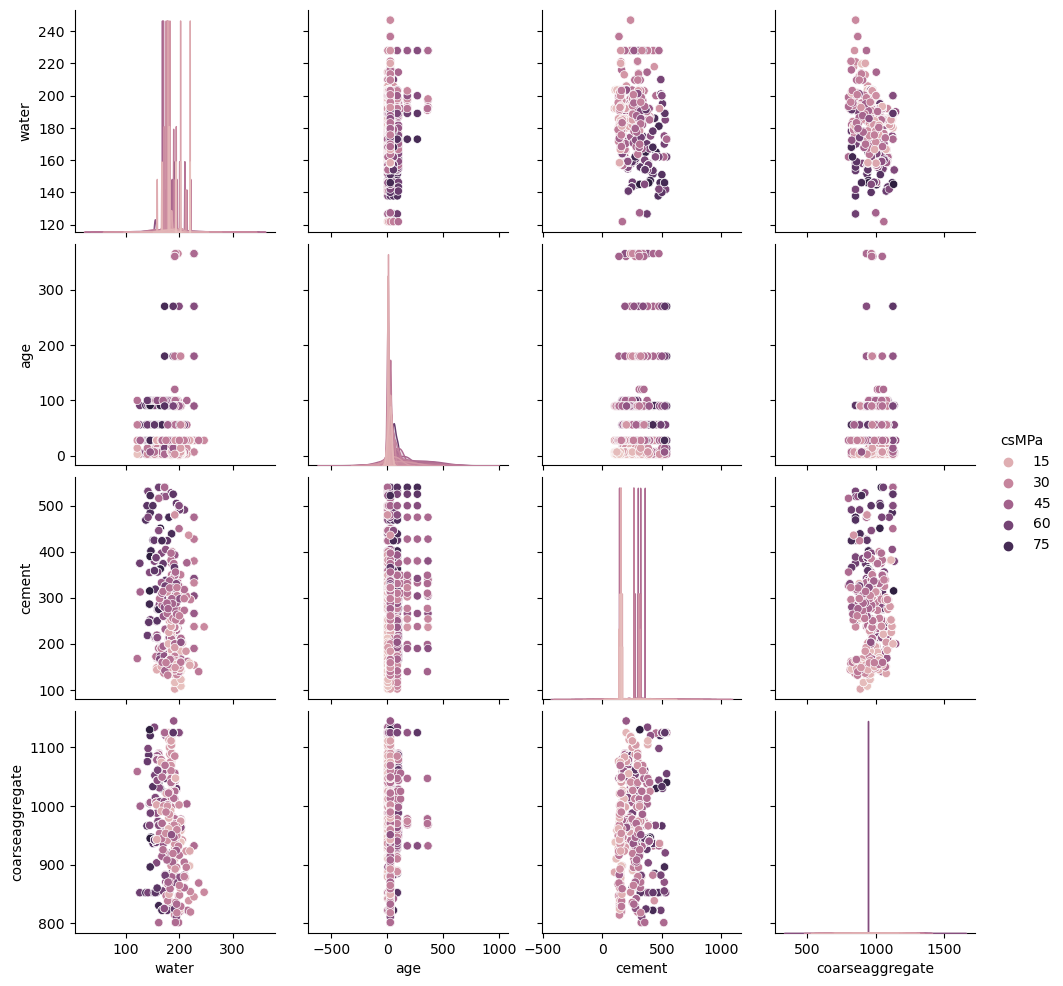

In [22]:


mutual_info_series = pd.Series(mi, index=X.columns)

top_4_features = mutual_info_series.sort_values(ascending=False).index[:4]

plt.figure(figsize=(15, 10))
sns.pairplot(data=df, hue='csMPa', vars=top_4_features)
plt.show()